# Quantum Teleportation

In [2]:
import qiskit
from qiskit import QuantumCircuit,  QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_histogram

### Single Qubit Teleportation

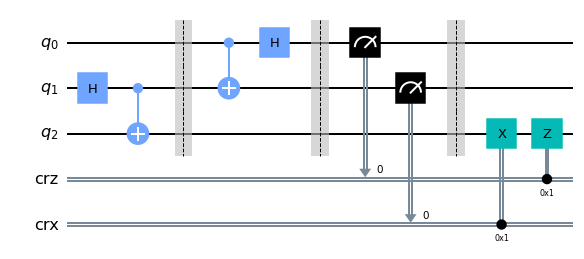

In [3]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure([qr[0],qr[1]],[crz[0],crx[0]])

qc.barrier()
qc.x(2).c_if(crx, 1) # Apply gates if the registers 
qc.z(2).c_if(crz, 1) # are in the state '1'

qc.draw('mpl')

### Multi-Qubit Teleportation

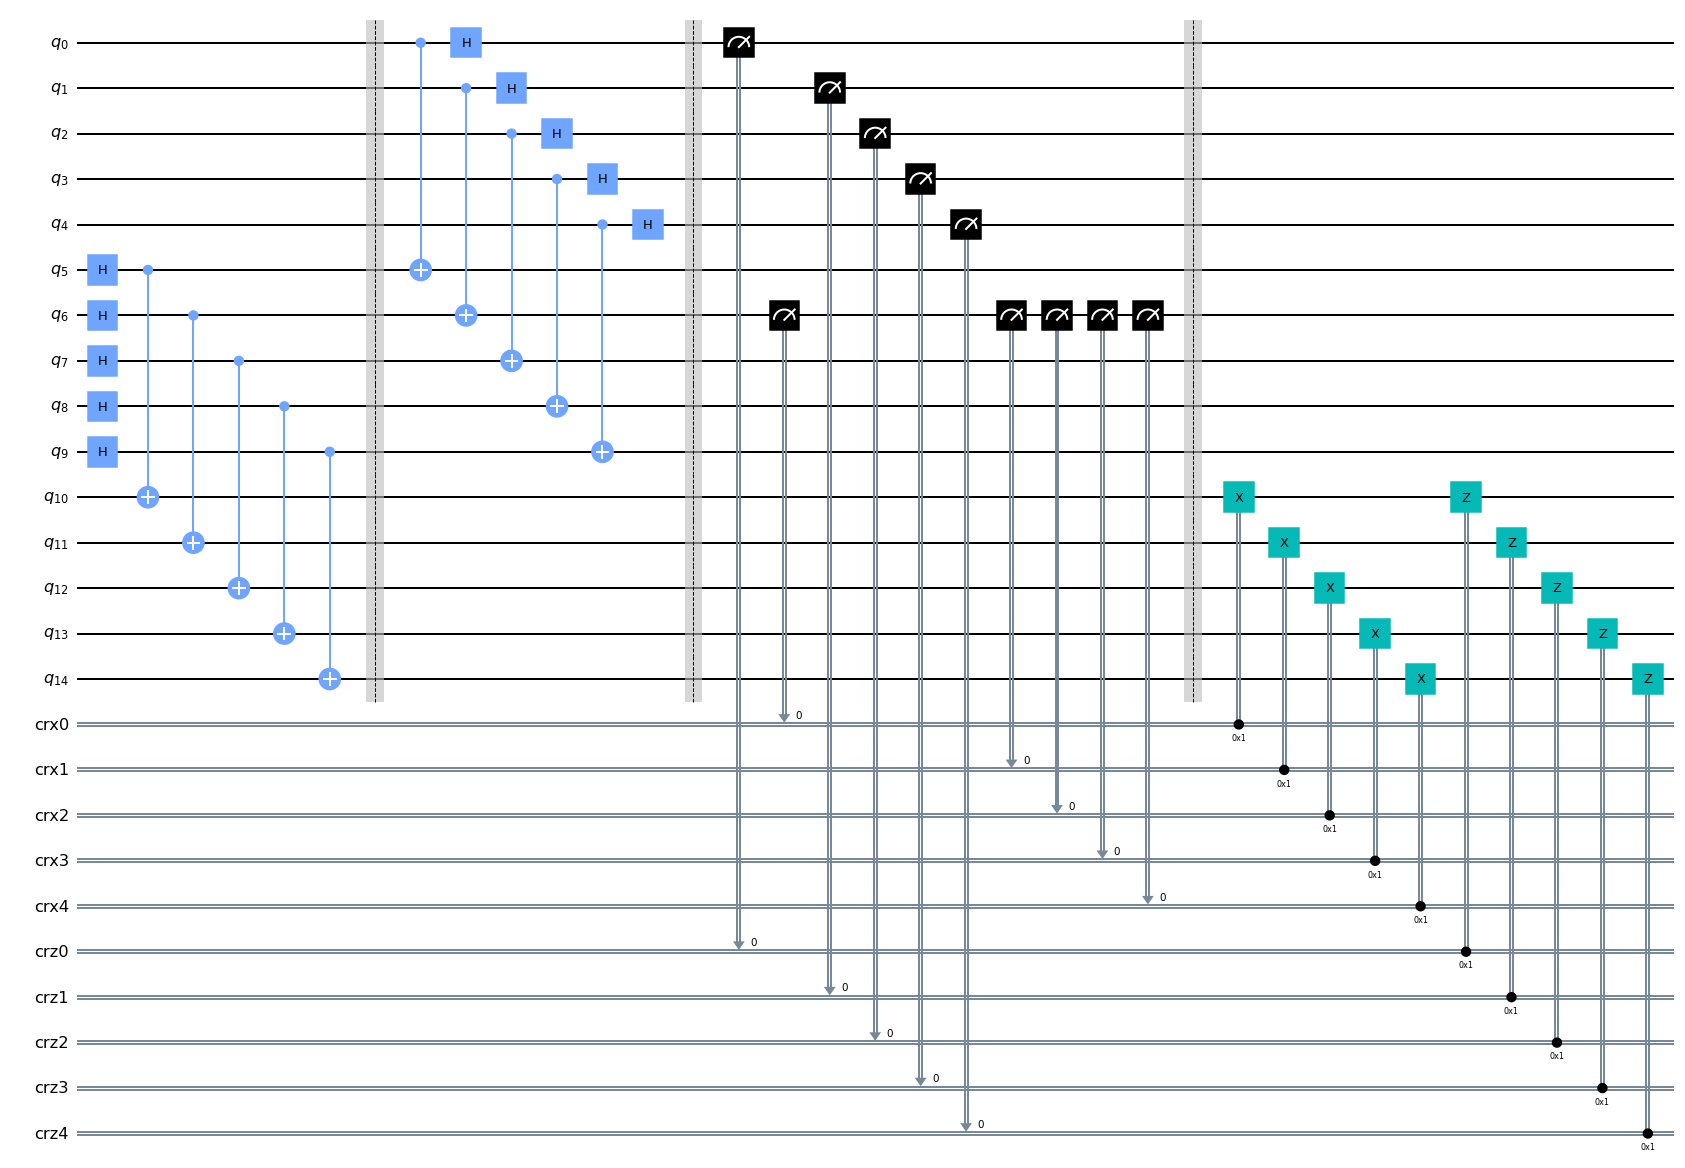

In [4]:
total = 5

nq = 3*total
qr = QuantumRegister(nq, name="q")
crz = [total]
crx = [total]
for i in range(total):
    crz[i] = ClassicalRegister(1, name="crz"+str(i))
    crx[i] = ClassicalRegister(1, name="crx"+str(i))
    crz.append(crz[i])
    crx.append(crx[i])
    
crx.pop()
crz.pop()

x = (crx[i] for i in range(total))
z = (crz[i] for i in range(total))

qc = QuantumCircuit(qr, *x,*z)
#qc = QuantumCircuit(qr, crz[0],crx[0],crz[1] ,crx[1])

for i in range(0,total):
    qc.h(i+total)
    qc.cx(i+total,2*total+i)

qc.barrier()

for i in range(total):
    qc.cx(i,i+total)
    qc.h(i)
    
qc.barrier()

for i in range(total):
    #qc.measure([qr[i],qr[total+1]],[crz[i],crx[i]])
    qc.measure(qr[i],crz[i])
    qc.measure(qr[total+1],crx[i])

qc.barrier()

for i in range(total):
    qc.x(2*total+i).c_if(crx[i], 1) # Apply gates if the registers 
    qc.z(2*total+i).c_if(crz[i], 1) # are in the state '1'

#qc.x(2*total+i).c_if(crx[2], 1)
qc.draw('mpl',fold=-1)
#c.draw('mpl',scale=0.5,fold=-1)